In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
class KNeighbors(object):
  def __init__(self, n_neighbors=5):
    self.n_neighbors = n_neighbors
    self.X_train = None
    self.y_train = None

  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def predict(self,X_test):
    label=[]
    for i in range(X_test.shape[0]):
      distances = np.array([np.linalg.norm(self.X_train[j] - X_test[i]) for j in range(self.X_train.shape[0])])
      neighbors_index = np.argsort(distances)[:self.n_neighbors]
      label.append(np.argmax(np.bincount(self.y_train[neighbors_index])))
    return np.array(label)

  def score(self, sample, targets):
    return np.sum( self.predict(sample) == targets ) / float(len(targets))



In [22]:
def plot_result(clf, X_train, y_train, X_test, y_test, feature_names, png_name):
    X = np.r_[X_train, X_test]
    y = np.r_[y_train, y_test]

    markers = ('s', 'd', 'x', 'o', '^', 'v')
    colors = ('green', 'yellow', 'red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    labels = ('setosa', 'versicolor', 'virginica')

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    dx = 0.02
    X1 = np.arange(x1_min, x1_max, dx)
    X2 = np.arange(x2_min, x2_max, dx)
    X1, X2 = np.meshgrid(X1, X2)
    Z = clf.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Z = Z.reshape(X1.shape)

    fig_size_factor = 1.0
    plt.figure(figsize=(12 * fig_size_factor, 10 * fig_size_factor))
    plt.clf()
    plt.contourf(X1, X2, Z, alpha=0.5, cmap=cmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for idx, cl in enumerate(np.unique(y_train)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=1.0, c=cmap(idx),
                    marker=markers[idx], label=labels[idx])

    plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c="", marker="o", s=100, label="test set")

    plt.title("Decision region(" + png_name + ")")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend(loc="upper left")
    plt.grid()
    plt.show()
    #plt.savefig("decision_region_" + png_name + ".png", dpi=300)


--------------------------------------------------
my k-nearest neighbors score:0.9333333333333333


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.6/dist-packages/ipykern

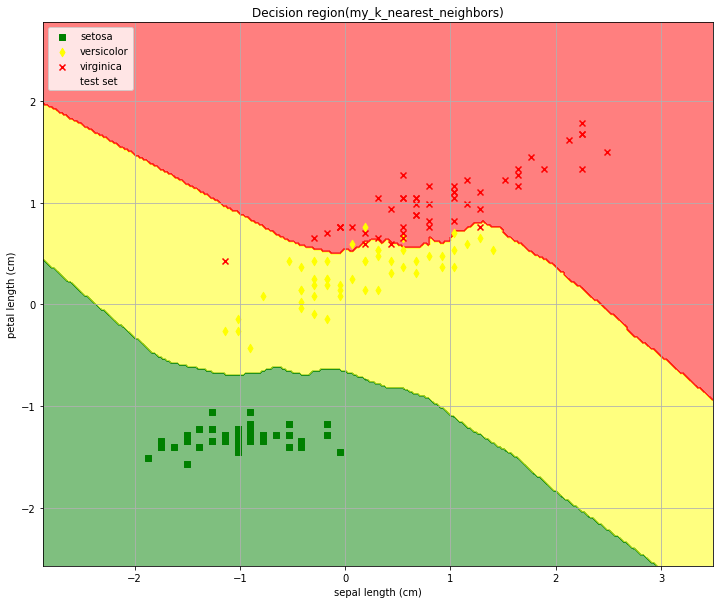

In [23]:
    use_feature_index = [0 ,2]
    iris = datasets.load_iris()
    X = iris.data[:, use_feature_index]
    y = iris.target
    feature_names = np.array(iris.feature_names)[use_feature_index]

    #--- feature standardization
    sc = StandardScaler()
    X_std = sc.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

    n_neighbors = 5

    # --- my KNeighbors
    clf_m = KNeighbors(n_neighbors=n_neighbors)
    clf_m.fit(X_train, y_train)
    score_m = clf_m.score(X_test, y_test)

    #--- print score
    print("-"*50)
    print("my k-nearest neighbors score:" + str(score_m))

    # --- output decision region
    plot_result(clf_m, X_train, y_train, X_test, y_test, feature_names, "my_k_nearest_neighbors")